In [26]:
import spacy
from spacy_langdetect import LanguageDetector
from spacy.lang.tr.stop_words import STOP_WORDS
import pandas as pd
import re

In [27]:
import spacy
nlp = spacy.load("tr_core_news_lg")

doc = nlp("Dün ben de gittim.")

for token in doc:
    # Her token için istediğiniz işlemi gerçekleştirin
    print(token.text, token.lemma_, token.pos_, token.tag_)

c:\Users\Umitk\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'tr_core_news_lg' (3.4.2) was trained with spaCy v3.4.2 and may not be 100% compatible with the current version (3.7.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Dün dün ADV Noun
ben ben PRON Pers
de de CCONJ Conj
gittim git VERB Verb
. . PUNCT Punc


In [28]:
dataset = pd.read_json("..\dataset\Turkish_data_depository_630koseyazisi.jsonl", lines=True)
print(dataset.head())

  writer  file_id                                             column
0    ttu       27  O zaman 28 Şubat neden yapıldı?  \r\n     \r\n...
1    ttu       28  O zaman 28 Şubat neden yapıldı?  \r\n     \r\n...
2    ttu        3  Cumhuriyetin en kritik yerel seçimi \r\nMURAT ...
3    ttu        4  Çekilin artık kamera karşısından \r\nHER kar y...
4    ttu       23  Lorant'ın heyecan veren hedefi  \r\n     \r\n\...


In [37]:
x = dataset["column"].astype(str)
y = dataset["writer"].astype(str)

index = 3
print(f"{index}.yazar : {y[index]} \n{index}.yazı : {x[index]}")

3.yazar : ttu 
3.yazı : Çekilin artık kamera karşısından 
HER kar yağışında böyle olur. İstanbullular hep birlikte aynı tiyatroyu oynarlar. 

Vatandaşlar yolları tıkamak için her şeyi yaparlar. 

Günlük güneşlik havada bile doğru dürüst araç kullanamayanlar karda direksiyon başına geçip olmadık gösteriler yapmaya kalkarlar. 

Hemen hiç kimse kar lastiği, zincir kullanmaz. Kayıp bir başka araca ya da yolun korkuluklarına bindirirler ve yolu tıkarlar. 

Bazıları da uyanıklık yapıp ters yola girerler. 

Kimilerinin de benzinleri bittiği için yolda kalırlar. 

Çoğunlukla belediye ekipleri tam siper olurlar. 

Trafikçiler de öyle... 

Karayolları ekipleri ise Kent içi yollar beni ilgilendirmez diye üslerinden çıkmazlar. 

İstanbul'u yönetenler ne yapar? 

Onların hiç değişmeyen işleri vardır. Onlar kanal kanal dolaşıp alınan sanal önlemleri ballandıra ballandıra anlatırlar. 

Halkı soğukkanlı hareket etmeye çağırır, her şeyin kontrol altında olduğunu söylerler.

(Uygar ülkelerde bu işi 

In [42]:

for i in range(len(x)):
    # küçük harfe çevirme
    x[i] = x[i].lower()
    
    # kaçış karakterlerini temizleme
    x[i] = re.sub(r'[\r\n]', ' ', x[i])
    
    # noktalama işaretlerini temizleme
    x[i] = re.sub(r'[^\w\s]', '', x[i])
    
    # stop word'leri temizleme
    x[i] = ' '.join([word for word in x[i].split() if word not in STOP_WORDS])
    

In [43]:
index = 3
print(f"{index}.yazar : {y[index]} \n{index}.yazı : {x[index]}")

3.yazar : ttu 
3.yazı : çekilin kamera karşısından kar yağışında istanbullular aynı tiyatroyu oynarlar vatandaşlar yolları tıkamak yaparlar günlük güneşlik havada dürüst araç kullanamayanlar karda direksiyon başına geçip olmadık gösteriler yapmaya kalkarlar hemen kar lastiği zincir kullanmaz kayıp bir araca yolun korkuluklarına bindirirler yolu tıkarlar bazıları uyanıklık yapıp ters yola girerler kimilerinin benzinleri bittiği yolda kalırlar belediye ekipleri siper olurlar trafikçiler karayolları ekipleri kent içi yollar ilgilendirmez üslerinden çıkmazlar istanbulu yönetenler yapar değişmeyen işleri vardır kanal kanal dolaşıp alınan sanal önlemleri ballandıra ballandıra anlatırlar halkı soğukkanlı hareket etmeye çağırır şeyin kontrol altında söylerler uygar ülkelerde işi yöneticilerin görevlendirdiği sözcüler yapar belli aralıklarla sözcü basına açıklamalar yapıp bilgi verir yetkililerin tvlerde açıklama saatlerde a planı b planı c planı sundukları önlemlerin tümü iflas etmiş halk soka

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


# BoW (Bag of Words) vektörlerini oluşturma
bow_vectorizer = CountVectorizer()
bow_vectors = bow_vectorizer.fit_transform(x)

# TF-IDF vektörlerini oluşturma
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(x)

# Vektörlerin boyutlarını kontrol etme
print("BoW vektörleri boyutu:", bow_vectors.shape)
print("TF-IDF vektörleri boyutu:", tfidf_vectors.shape)



BoW vektörleri boyutu: (630, 56485)
TF-IDF vektörleri boyutu: (630, 56485)


# SVM

SVM Modeli Doğruluğu: 0.8095238095238095


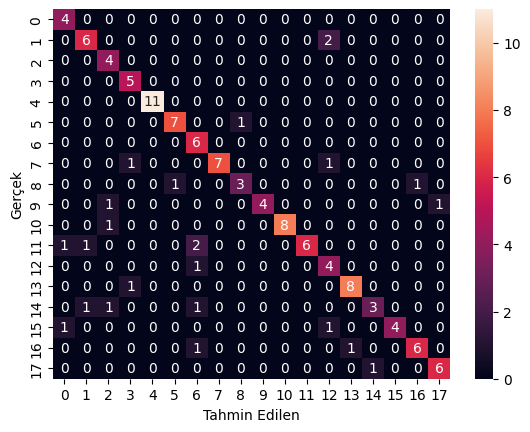

              precision    recall  f1-score   support

         aar       0.67      1.00      0.80         4
         bco       0.75      0.75      0.75         8
         cul       0.57      1.00      0.73         4
         cun       0.71      1.00      0.83         5
         ebr       1.00      1.00      1.00        11
         gur       0.88      0.88      0.88         8
         hin       0.55      1.00      0.71         6
         kaz       1.00      0.78      0.88         9
         lev       0.75      0.60      0.67         5
         msa       1.00      0.67      0.80         6
         oek       1.00      0.89      0.94         9
         psu       1.00      0.60      0.75        10
         sav       0.50      0.80      0.62         5
         tal       0.89      0.89      0.89         9
         ttu       0.75      0.50      0.60         6
         tug       1.00      0.67      0.80         6
         ved       0.86      0.75      0.80         8
         yba       0.86    

In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Verileri eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(tfidf_vectors, y, test_size=0.2, random_state=42)

# Destek Vektör Makinesi (SVM) modelini oluşturma ve eğitme
svm_model = SVC(kernel='sigmoid',C=1,gamma=10,max_iter=500)
svm_model.fit(x_train, y_train)

# Test seti üzerinde modelin performansını değerlendirme
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Modeli Doğruluğu:", accuracy)

# karar ağacı modelinin performansını görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

# Sınıflandırma raporunu görüntüleme
class_report = classification_report(y_test, y_pred)
print(class_report)

SVM Modeli Doğruluğu: 0.031746031746031744


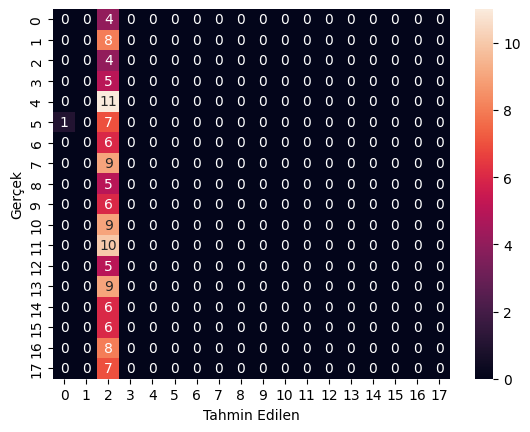

              precision    recall  f1-score   support

         aar       0.00      0.00      0.00         4
         bco       0.00      0.00      0.00         8
         cul       0.03      1.00      0.06         4
         cun       0.00      0.00      0.00         5
         ebr       0.00      0.00      0.00        11
         gur       0.00      0.00      0.00         8
         hin       0.00      0.00      0.00         6
         kaz       0.00      0.00      0.00         9
         lev       0.00      0.00      0.00         5
         msa       0.00      0.00      0.00         6
         oek       0.00      0.00      0.00         9
         psu       0.00      0.00      0.00        10
         sav       0.00      0.00      0.00         5
         tal       0.00      0.00      0.00         9
         ttu       0.00      0.00      0.00         6
         tug       0.00      0.00      0.00         6
         ved       0.00      0.00      0.00         8
         yba       0.00    

c:\Users\Umitk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Umitk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Umitk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Verileri eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(bow_vectors, y, test_size=0.2, random_state=42)

# Destek Vektör Makinesi (SVM) modelini oluşturma ve eğitme
svm_model = SVC(kernel='sigmoid',C=1,gamma=10,max_iter=500)
svm_model.fit(x_train, y_train)

# Test seti üzerinde modelin performansını değerlendirme
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Modeli Doğruluğu:", accuracy)

# karar ağacı modelinin performansını görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

# Sınıflandırma raporunu görüntüleme
class_report = classification_report(y_test, y_pred)
print(class_report)

# yapay sinir ağları

In [53]:
print(type(tfidf_vectors))

<class 'scipy.sparse._csr.csr_matrix'>


In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors.toarray(), y, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Tensor veri türüne dönüştürme
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

# Yapay Sinir Ağı (PyTorch) modeli oluşturma
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

model = NeuralNetwork(X_train_tensor.shape[1], 100, len(set(dataset["writer"])))

# Optimizasyon ve kayıp fonksiyonunu tanımlama
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Modeli eğitme
for epoch in range(10):
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

# Modeli test etme
with torch.no_grad():
    output = model(X_test_tensor)
    _, y_pred = torch.max(output, 1)

# Doğruluk değerini hesaplama
accuracy = accuracy_score(y_test_tensor.numpy(), y_pred.numpy())
print("Model doğruluğu:", accuracy)

Model doğruluğu: 0.3968253968253968
